<a href="https://colab.research.google.com/github/team-epoch/EPOCH_4th_TASK/blob/main/EPOCH/4th_TASK/DevelopTeam/week1/Practice/04%EA%B8%B0_%EC%9C%A4%EB%8B%A4%EB%B9%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# WEEK 1 4장 선형회귀
### 보험료 예측하기
##### 4기 윤다빈


## 4.2 라이브러리 및 데이터 불러오기

In [2]:
import pandas as pd

In [3]:
file_url = 'https://media.githubusercontent.com/media/musthave-ML10/data_source/main/insurance.csv'

In [4]:
data  = pd.read_csv(file_url) # 데이터셋 읽

### 데이터 불러오기
- 라이브러리 pandas 임포트
- 판다스 데이터프레임 형태로 데이터 부르기



## 4.3 데이터 확인하기

In [5]:
data # 전체 데이터 출력

,age,sex,bmi,children,smoker,charges
0,19,0,27.900,0,1,16884.92400
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,3,0,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,0,3866.85520
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830
1334,18,0,31.920,0,0,2205.98080
1335,18,0,36.850,0,0,1629.83350
1336,21,0,25.800,0,0,2007.94500


In [6]:
 data.head() # 상위 5줄 출

,age,sex,bmi,children,smoker,charges
0,19,0,27.900,0,1,16884.92400
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,3,0,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,0,3866.85520


#### 1. 변수의 유형
- age : 연속형
- sex : 범주형 (1: 남자, 0: 여자)
- bmi : 연속형
- children : 정수형
- smoker : 범주형 (1: 흡연자, 0: 비흡연자)
- charges : 연속형

#### 2. 범주형 변수 vs 연속형 변수
- 범주형 변수 : 수량화 x, 분류
- 연속형 변수 : 수량화 o, 회귀

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   charges   1338 non-null   float64
dtypes: float64(2), int64(4)
memory usage: 62.8 KB


- Dtype은 자료형을 나타냄
- 모두 숫자형 데이터이기에 float과 int로만 구성되어 있음

In [8]:
data.describe()

,age,sex,bmi,children,smoker,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,63770.428010


In [9]:
round(data.describe(), 2)

,age,sex,bmi,children,smoker,charges
count,1338.00,1338.00,1338.00,1338.00,1338.0,1338.00
mean,39.21,0.51,30.66,1.09,0.2,13270.42
std,14.05,0.50,6.10,1.21,0.4,12110.01
min,18.00,0.00,15.96,0.00,0.0,1121.87
25%,27.00,0.00,26.30,0.00,0.0,4740.29
50%,39.00,1.00,30.40,1.00,0.0,9382.03
75%,51.00,1.00,34.69,2.00,0.0,16639.91
max,64.00,1.00,53.13,5.00,1.0,63770.43


#### 변수별 평균 vs 중앙값
- age : 평균 ) 39.21, 중앙값 ) 39
- sex : 남자가 더 많음
- bmi : 30.66, 30.40
- children : 1.09, 1
- smoker : 비흡연자가 더 많음
- charges : 13270.42, 9382.03

## 4.4 전처리: 학습셋과 실험셋 나누기

## 4.4.1 변수와 데이터셋을 나누는 이유
### 1. 전체 데이터를 가지고 학습했을 때
- 다시 예측값을 만들어 비교했을 때, 예측이 잘될 것이라고 장담할 수 없다.
- 이유 : 모델 제작 이후 새로운 데이터에 맞는지 검증하지 않았기 때문이다.

### 2. 학습셋과 시험셋을 나눴을 때
- 학습셋 : 시험셋 = 1000 : 338이라 하자. 338개의 데이터는 모델 학습이 완료된 이후 평가용으로 사용 가능
- 338개의 데이터는 처음 넣는 데이터이기에 시험셋을 모델에 넣었을 때도 성능이 좋게 나온다면, 모델이 유효하다는 결론을 내릴 수 있다.
- 학습셋과 시험셋의 비율은 7:3 또는 8:2
- 학습셋이 더 중요하기에 전체 데이터 크기가 작다면 학습셋의 비율을 최대한 높힌다.

## 4.4.2 데이터셋 나누기

In [10]:
X = data[['age', 'sex', 'bmi', 'children', 'smoker']] # 독립변수
y = data['charges'] # 종속변수

In [11]:
from sklearn.model_selection import train_test_split # 사이킷런 임포트

sklearn에서는 train_test_split 제공

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=100) # 데이터셋 분할

### 1. 좌항
- train_test_split() : 데이터셋 4개 (X_train, X_test, y_train, y_test)를 결과물로 내보낸다. 따라서 좌항에 변수 4개가 필요하다.

### 2. 우항
- test size : 학습셋 80%, 시험셋 20%
- train_test_split() : 랜덤 샘플링 지원. 매번 실행할 때마다 train_set과 test_set에 들어가는 데이터가 달라짐.
- random_state 옵션 : 랜덤하게 샘플링하면서도 지속적으로 같은 데이터 분류를 지원


## 4.5 모델링

## 과정
알고리즘 선택 -> 모델 생성 -> 모델 학습

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
model = LinearRegression()

In [15]:
model.fit(X_train, y_train)

LinearRegression()

### '학습시킨다' 의 정의
- 데이터를 모델 안에 넣어서 독립변수와 종속변수 간의 관계들을 분석해 새로운 데이터를 예측할 수 있는 상태로 만드는 것.

## 4.6 모델을 활용해 예측하기

### 오버피팅 overfitting
- 학습셋과 시험셋을 각각 사용해 해당 문제 확인
- 모델이 학습셋에 지나치게 잘 맞도록 학습되어서 새로운 데이터에 대한 예측력이 떨어짐
- 과적합, 과학습이라고도 불림


In [16]:
pred = model.predict(X_test) # 예측 대상을 넣는 것, 목표 변수가 포함되면 안됨

## 4.7 예측 모델 평가하기

In [17]:
comparison = pd.DataFrame({'actual': y_test, 'pred': pred})

## 4.7.1 테이블로 평가하기

In [18]:
comparison

,actual,pred
12,1826.84300,4765.249466
306,20177.67113,4957.730865
318,7421.19455,8298.988153
815,1877.92940,3078.811868
157,15518.18025,24165.956542
...,...,...
713,1984.45330,5776.764928
1282,14283.45940,23102.847340
531,14043.47670,14280.732585
537,8825.08600,10527.417291


- 실젯값과 예측값이 비슷한 관측치, 실젯값과 예측값의 차이가 큰 관측치가 존재
- 한눈에 들어오지 않음

## 4.7.2 그래프로 평가하기

In [19]:
import matplotlib.pyplot as plt # ❶
import seaborn as sns # ❷

<Axes: xlabel='actual', ylabel='pred'>

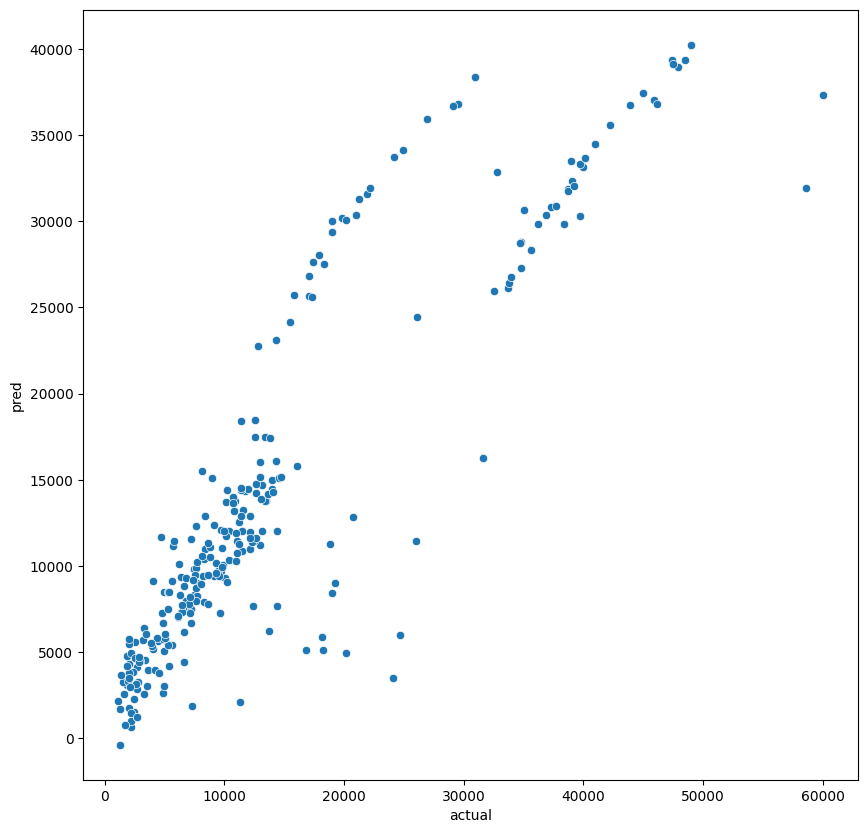

In [20]:
plt.figure(figsize=(10,10)) # ❶ 그래프 크기를 정의
sns.scatterplot(x = 'actual', y = 'pred', data = comparison) # ❷

## 세 영역으로 파악
- 실젯값과 예측값이 비슷한 경우
- 실젯값보다 예측값이 높게 나타난 경우
- 실젯값보다 예측값이 더 낮은 경우

## 4.7.3 통계적 방법 : RMSE

In [21]:
from sklearn.metrics import mean_squared_error # ❶ MSE 라이브러리 임포트
mean_squared_error(y_test, pred) ** 0.5 # ❷ RMSE 계산 실행

5684.927776334485

In [31]:
import numpy as np

mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
print(rmse)

5684.927776334485


In [32]:
model.score(X_train, y_train)

0.7368220127747351

## 4.8 이해하기 : 선형 회귀 (Linear Regression)

In [34]:
model.coef_

array([2.64799803e+02, 1.73446608e+01, 2.97514806e+02, 4.69339602e+02,
       2.34692802e+04])

In [35]:
pd.Series(model.coef_, index = X.columns)

,0
age,264.799803
sex,17.344661
bmi,297.514806
children,469.339602
smoker,23469.280173


In [33]:
model.intercept_

np.float64(-11576.999976112367)

charges = 264.799803age + 17.344661sex + 297.514806bmi + 469.339602children + 23469.280173smoker - 11576.999976112367

# 학습 마무리
#### 보험료 예측 모델 만드는 과정
문제 정의 -> 라이브러리 및 데이터 불러오기 -> 데이터 확인하기 -> 전처리 : 학습셋과 실험셋 나누기 -> 데이터 모델링 -> 모델을 활용해 예측하기 -> 예측 모델 평가하기

#### 유의할 점
- 성별이 1 커질 때와 나이가 1 커질 때 가지는 영향력이 다름.
- 변수 스케일링 방법 : K-최근접 이웃 (KNN)

### 관련 모델
#### 1. 릿지 회귀 (Ridge Regression)
- 패키지: from sklearn.linear_model import Ridge
- L2 정규화 적용 모델 (오버피팅 억제)

#### 2. 라쏘 회귀 (Lasso Regression)
- 패키지 : from sklearn.linear_model import Lasso
- L1 정규화 적용 모델 (피처 셀렉션 및 오버피팅 억제)
- 피처 셀렉션 (Feature Selection) : 불필요한 다수의 피처들로 인해 모델 성능을 떨어뜨릴 가능성 제거, 설명 가능한 모델이 될 수 있도록 피처들을 선별

#### 3. 엘라스틱 넷 (Elastic Net)
- 패키지 : from sklearn.linear_model import ElasticNet
- 릿지 회귀와 라쏘 회귀의 단점을 절충시킨 모델


# 질문
1. charges의 화폐단위는 무엇인가? (4.3)
2. train_test_split=100을 넣었는데, 이때 100을 넣을 때와 200을 넣을 때의 차이점, 혹은 50을 넣을 때의 차이점이 궁금하다. (4.4)
3. random_state에 100보다 큰 숫자를 넣을 때와 작은 숫자를 넣을 때 어떤 차이가 있는지 궁금하다. (4.4.2)
4. R을 사용할 때 주로 결정계수를 사용해서 분석 결과를 확인했다. 실제로 RMSE를 사용하는 경우가 많은지 궁금하다.
5. mean_squared_error(y_test, pred, squared = False)을 실행했을 때 오류 뜬다. (수동으로 rmse 계산함)